In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
type(california)

sklearn.utils._bunch.Bunch

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
california.data.shape

(20640, 8)

In [7]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [10]:
y = data.Price
X = data.drop('Price', axis=1)

In [11]:
y.shape, X.shape

((20640,), (20640, 8))

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
model.score(X, y)

0.606232685199805

In [15]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [16]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.436693293134325
HouseAge 0.00943577803323845
AveRooms -0.10732204139090426
AveBedrms 0.6450656935198124
Population -3.976389421180351e-06
AveOccup -0.0037865426549710595
Latitude -0.421314377527144
Longitude -0.43451375467477726


In [17]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718445


In [18]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [19]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [21]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print("R^2:", r2)
print("MSE:", mse)
print("MAE:", mae)

R^2: 0.606232685199805
MSE: 0.5243209861846072
MAE: 0.5311643817546464


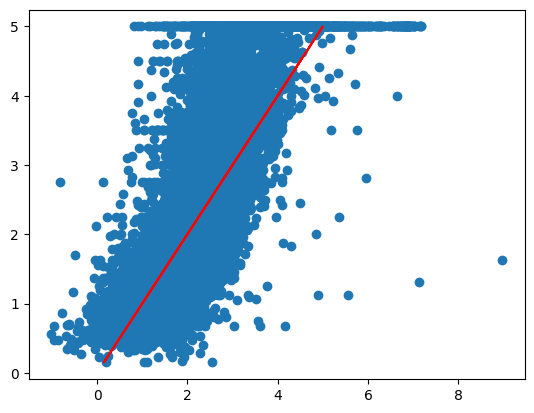

In [22]:
plt.scatter(y_pred, y)
plt.plot(y, y, color='red')

In [ ]:
# Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
# Метод опорных векторов
# Без ядра
# С гауссовым ядром
# С полиномиальным ядром
# Метод ближайших соседей
# Многослойный перцептрон
# Дерево решений
# (*) Другие методы:
# Гребневую регрессию
# Регрессию Лассо
# Регрессию ElasticNet
# Случайный лес
# Беггинг
# Другие модели по желанию
# Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [23]:
import time
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


def train_and_evaluate_models(X, y):
    models = {
    "LinearRegression": LinearRegression(),  # Обычная линейная регрессия (без регуляризации)

    "KNeighbors": KNeighborsRegressor(),  # Метод k-ближайших соседей (по умолчанию 5 соседей)
    # Параметры:
    # n_neighbors=5 — количество соседей для предсказания
    # weights='uniform' — равномерное влияние соседей (можно 'distance', тогда ближние важнее)

    "DecisionTree": DecisionTreeRegressor(random_state=42),  # Дерево решений
    # Параметры:
    # random_state=42 — фиксируем случайность для воспроизводимости
    # max_depth=None — глубина дерева (если None, то разрастается до конца)
    # min_samples_split=2 — минимальное количество объектов для разбиения

    "Ridge": Ridge(alpha=1.0),  # Линейная регрессия с L2-регуляризацией (Ridge)
    # Параметры:
    # alpha=1.0 — коэффициент регуляризации (чем выше, тем сильнее штраф за большие веса)

    "Lasso": Lasso(alpha=0.1),  # Линейная регрессия с L1-регуляризацией (Lasso)
    # Параметры:
    # alpha=0.1 — штраф за большие коэффициенты, может обнулять незначимые признаки

    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),  # Комбинированная регуляризация (L1 + L2)
    # Параметры:
    # alpha=0.1 — общий коэффициент регуляризации
    # l1_ratio=0.5 — 50% L1 (Lasso), 50% L2 (Ridge)

    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),  # Случайный лес (ансамбль деревьев)
    # Параметры:
    # n_estimators=100 — количество деревьев
    # random_state=42 — фиксируем случайность
    # max_depth=None — неограниченная глубина деревьев

    "Bagging": BaggingRegressor(n_estimators=10, random_state=42)  # Бэггинг (ансамбль слабых моделей)
    # Параметры:
    # n_estimators=10 — количество базовых моделей (обычно деревьев)
    # random_state=42 — фиксируем случайность
}
    
    results = []
    
    for name, model in models.items():
        # Замер времени обучения
        start_time = time.time()
        model.fit(X, y.values.ravel())
        elapsed = time.time() - start_time

        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        
        results.append({
            "Model": name,
            "R²": r2,
            "MSE": mse,
            "MAE": mae,
            "Время обучения (сек)": elapsed
        })
        
        print(f"{name}: R² = {r2:.4f}, MSE = {mse:.4f}, MAE = {mae:.4f}, Время = {elapsed:.4f} сек")
        
        # Если модель линейная, можно вывести коэффициенты
        if hasattr(model, "coef_"):
            print(f"Коэффициенты {name}: {model.coef_}")
        # Если модель дерева или ансамбль, можно вывести feature_importances_
        if hasattr(model, "feature_importances_"):
            print(f"Важность признаков {name}: {model.feature_importances_}")
        
        # Визуализация: сравнение предсказанных и реальных значений
        plt.figure(figsize=(6,4))
        plt.scatter(y_pred, y, color='blue', alpha=0.5, label="Предсказания")
        plt.plot(y, y, color='red', label="Идеальная линия")
        plt.title(f"{name} - Предсказания vs Реальные")
        plt.xlabel("Реальные значения")
        plt.ylabel("Предсказанные значения")
        plt.legend()
        plt.show()
        
    results_df = pd.DataFrame(results)
    return results_df

LinearRegression: R² = 0.6062, MSE = 0.5243, MAE = 0.5312, Время = 0.0040 сек
Коэффициенты LinearRegression: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


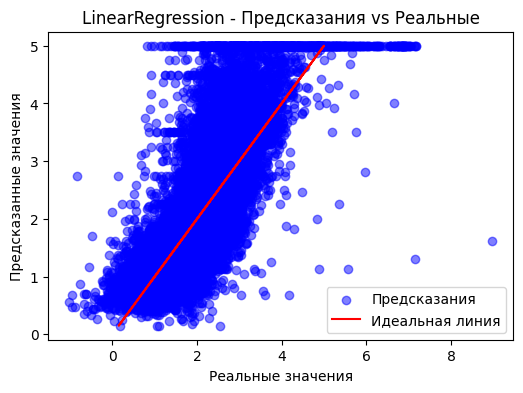

KNeighbors: R² = 0.4711, MSE = 0.7042, MAE = 0.6423, Время = 0.0408 сек


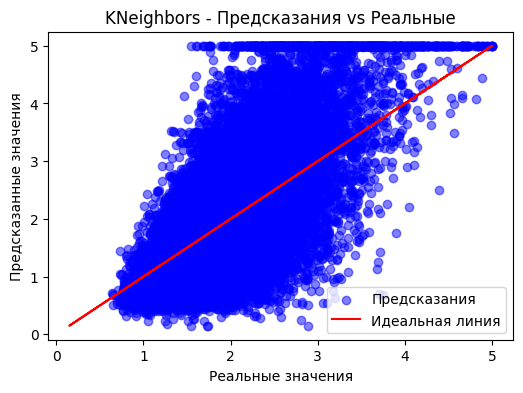

DecisionTree: R² = 1.0000, MSE = 0.0000, MAE = 0.0000, Время = 0.3027 сек
Важность признаков DecisionTree: [0.52500998 0.05100488 0.05341707 0.02651485 0.03282405 0.1320936
 0.09387213 0.08526344]


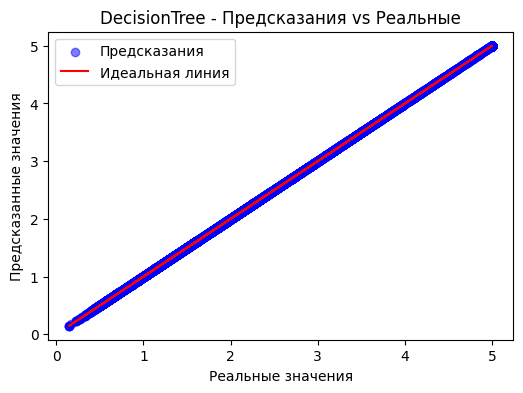

Ridge: R² = 0.6062, MSE = 0.5243, MAE = 0.5312, Время = 0.0064 сек
Коэффициенты Ridge: [ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]


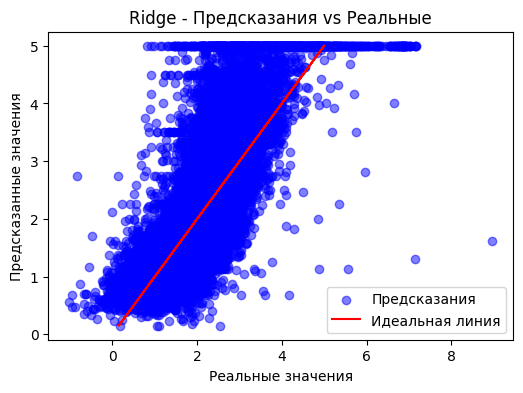

Lasso: R² = 0.5453, MSE = 0.6055, MAE = 0.5800, Время = 0.1627 сек
Коэффициенты Lasso: [ 3.90582557e-01  1.50821512e-02 -0.00000000e+00  0.00000000e+00
  1.75019561e-05 -3.32253135e-03 -1.14214430e-01 -9.92250689e-02]


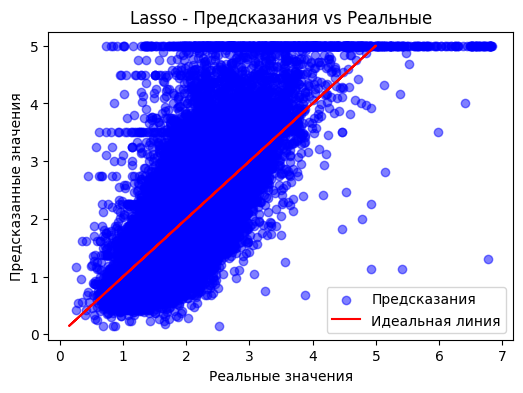

ElasticNet: R² = 0.5760, MSE = 0.5645, MAE = 0.5554, Время = 0.1696 сек
Коэффициенты ElasticNet: [ 3.83974678e-01  1.29518393e-02  0.00000000e+00  0.00000000e+00
  8.64190351e-06 -3.53409815e-03 -2.40655864e-01 -2.34445147e-01]


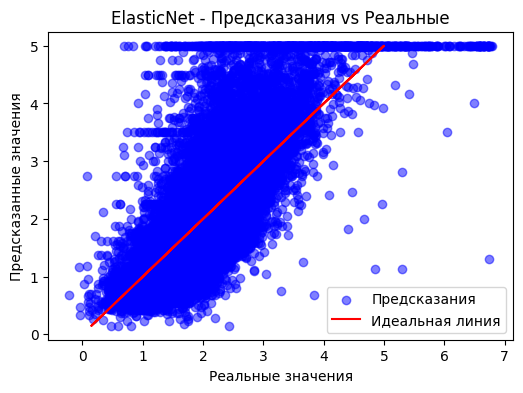

RandomForest: R² = 0.9740, MSE = 0.0347, MAE = 0.1194, Время = 19.9073 сек
Важность признаков RandomForest: [0.52003672 0.05296358 0.04451309 0.02929886 0.03123175 0.13640642
 0.09285575 0.09269383]


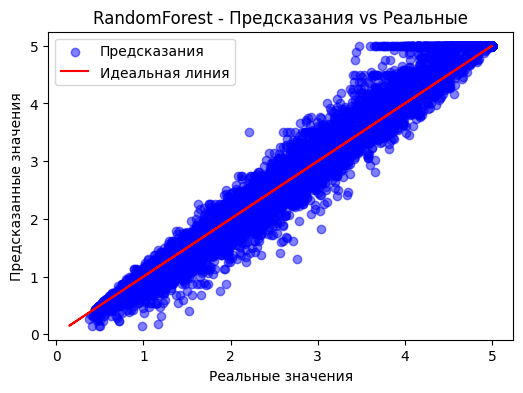

Bagging: R² = 0.9627, MSE = 0.0497, MAE = 0.1358, Время = 2.1669 сек


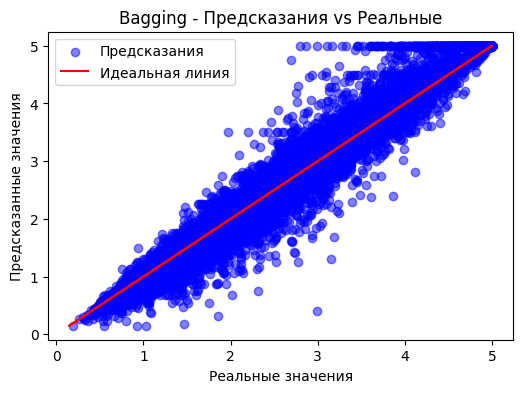


Сводная таблица результатов: 
              Model        R²           MSE           MAE  \
0  LinearRegression  0.606233  5.243210e-01  5.311644e-01   
1        KNeighbors  0.471119  7.042322e-01  6.422689e-01   
2      DecisionTree  1.000000  9.555001e-32  4.156882e-17   
3             Ridge  0.606233  5.243210e-01  5.311725e-01   
4             Lasso  0.545267  6.055004e-01  5.800438e-01   
5        ElasticNet  0.576044  5.645182e-01  5.553858e-01   
6      RandomForest  0.973975  3.465319e-02  1.193528e-01   
7           Bagging  0.962709  4.965429e-02  1.357827e-01   

   Время обучения (сек)  
0              0.004022  
1              0.040830  
2              0.302748  
3              0.006437  
4              0.162736  
5              0.169604  
6             19.907341  
7              2.166889  


In [24]:
results_df = train_and_evaluate_models(X, y)
print("\nСводная таблица результатов: ")
print(results_df)